Elazar Fine

https://www.kaggle.com/elfein

https://www.kaggle.com/elfein/assignment-1-titanic

In this competition we are given a dataset of passengers that were aboard the titanic when it drowned, with features for each passenger like `Sex`, `Age` `Pclass` etc and if they survived. 
We are to predict (`Binary Classification`) wether or not other passengers which we are not told wether they survived or not, in fact did.

## Imports and Definitions

In [4]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

## Data Investigation and Preprocessing

---

In [5]:
test_df  = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [6]:
test_df

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

### Before we analyze the data, let's first clean it up.

In [7]:
# function to drop a column from the df
def drop_col(df, col_name):
    df.drop([col_name], axis=1, inplace=True)

In [8]:
# Drop PassengerId, since it's not relevant to survival
drop_col(train_df, 'PassengerId')
# Can't drop for test_df since it's required for submission

In [9]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

As we can see, `Ticket` which is not numerical has 681 unique values, and will be irrelavant or too difficult to categorize, so we can remove it.
We will also remove the `Name` column for the same reason.

In [10]:
drop_col(train_df, 'Ticket')
drop_col(test_df,  'Ticket')
drop_col(train_df, 'Name')
drop_col(test_df,  'Name')

In [11]:
# calling this to look for incomplete columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [12]:
# replace all empty values to np.NaN values
train_df.replace('', np.NaN, inplace=True)
train_df.fillna(np.NaN, inplace=True)
test_df.replace('', np.NaN, inplace=True)
test_df.fillna(np.NaN, inplace=True)

# 'U' stands for `Unknown`
train_df['Embarked'].fillna("U", inplace=True)
test_df['Embarked'].fillna("U", inplace=True)

In [13]:
# count empty values in each column
def count_empty_values_in_each_column(df: pd.DataFrame):
  print('empty values')
  print('------------\n')
  
  for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")


count_empty_values_in_each_column(train_df)

empty values
------------

Survived: 0
Pclass: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Fare: 0
Cabin: 687
Embarked: 0


We can see that in `Cabin` we are missing 687 out of 891 values, so we will consider dropping it if we won't be able to extrapolate something meaninful for the valid values it has.

We can see that in `Age` we are missing 177 out of 891 values, so we will fill those with the columns mean.

In [14]:
# replace all the column's empty values with the column's mean value or a random one (50% chance for value around mean) 
# this is to avoid stack too many rows with the same exact value, but still being better than random.
def fill_na_random_or_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    mean = round(df_not_null[column_name].mean())
    std = round(df_not_null[column_name].std())
    df[column_name] = df[column_name].apply(
        lambda x: np.random.choice([
            mean,
            mean - std,
            mean + std,
            np.random.choice(df_not_null[column_name]),
            np.random.choice(df_not_null[column_name]),
            np.random.choice(df_not_null[column_name])
        ]) if pd.isnull(x) else x
    )

    
fill_na_random_or_mean(train_df, 'Age')
fill_na_random_or_mean(test_df, 'Age')
fill_na_random_or_mean(test_df, 'Fare')
train_df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
886         0       2    male  27.0      0      0  13.0000   NaN        S
887         1       1  female  19.0      0      0  30.0000   B42        S
888         0       3  female  30.0      1      2  23.4500   NaN        S
889         1       1    male  26.0      0      0  30.0000  C148        C
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]

Cabins are in the format of `<deck-letter><room-number>` we can transform the column into a category of `Deck` for better encoding, instead of flat out removing the entire column.

In [15]:
import re
LetterSearcher = re.compile("(\w)")

def cabin_to_deck(df):
    df['Cabin'].fillna("U", inplace=True) # U - Unknown
    df['Deck']  = df['Cabin'].map(lambda cabin: cabin[0])
    drop_col(df, 'Cabin')

cabin_to_deck(train_df)
cabin_to_deck(test_df)
train_df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Deck
0           0       3    male  22.0      1      0   7.2500        S    U
1           1       1  female  38.0      1      0  71.2833        C    C
2           1       3  female  26.0      0      0   7.9250        S    U
3           1       1  female  35.0      1      0  53.1000        S    C
4           0       3    male  35.0      0      0   8.0500        S    U
..        ...     ...     ...   ...    ...    ...      ...      ...  ...
886         0       2    male  27.0      0      0  13.0000        S    U
887         1       1  female  19.0      0      0  30.0000        S    B
888         0       3  female  30.0      1      2  23.4500        S    U
889         1       1    male  26.0      0      0  30.0000        C    C
890         0       3    male  32.0      0      0   7.7500        Q    U

[891 rows x 9 columns]

## Data Analysis

Let's display the cleaned data, and analyze it.
We will encode the data just to show to graphically better (in some specific graphs), this is just a temporary measure as later we will encode it differently specifically for the model.

In [16]:
train_graph_df = train_df.copy()

def encode_str(s: str) -> int:
    return ord(s[0]) - ord('A') + 1

train_graph_df["Sex"] = train_graph_df["Sex"].map(encode_str)
train_graph_df["Embarked"] = train_graph_df["Embarked"].map(encode_str)
train_graph_df["Deck"] = train_graph_df["Deck"].map(encode_str)

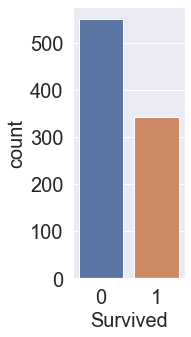

In [17]:
# show how many survived and didn't survive.
plt.figure(figsize=(2,5))
sns.countplot(x='Survived', data=train_df)
plt.show()

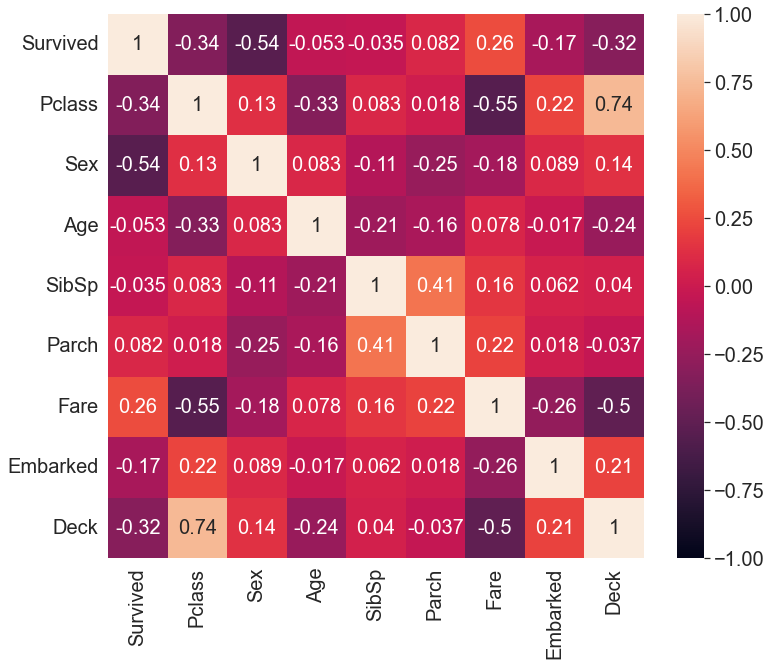

In [18]:
# show correlation between all features
plt.figure(figsize=(12,10))
cor = train_graph_df.corr()
sns.heatmap(cor, annot=True, vmin=-1, vmax=1)
plt.show()

We can see that the features most correlated with survival are `Sex`, `PClass` and `Deck`, let's try to analyze those better.

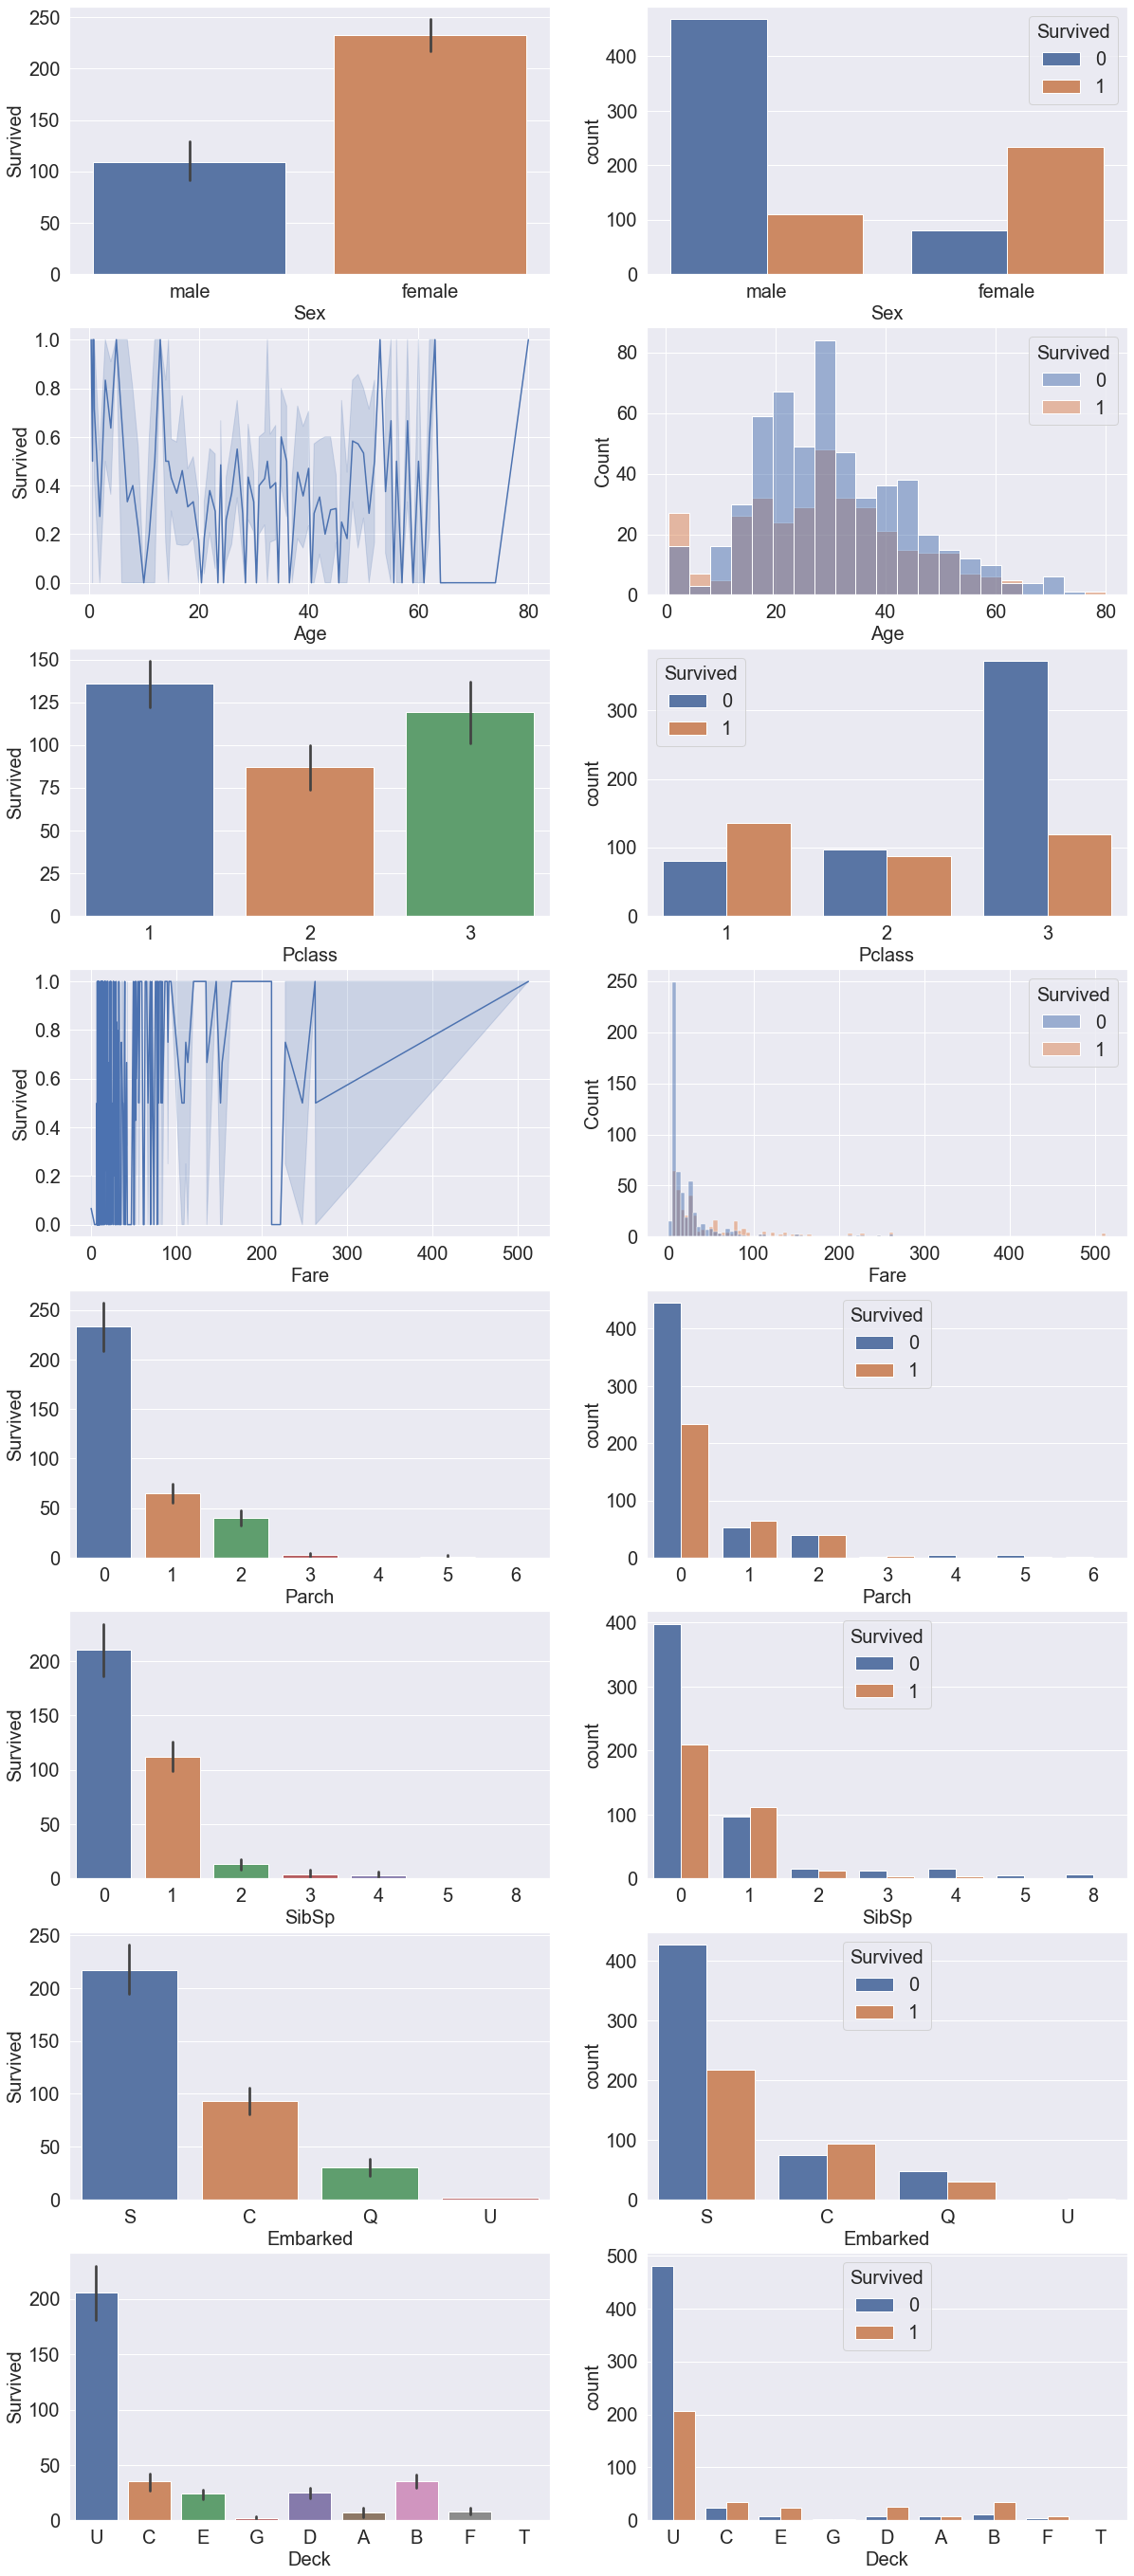

In [19]:
# show count and survival rate from each column
plt.figure(figsize=(20,55))

plt.subplot(9,2,1)
sns.barplot(x='Sex',y='Survived', data=train_df, estimator=np.sum)
plt.subplot(9,2,2)
sns.countplot(x='Sex', data=train_df, hue='Survived')

plt.subplot(9,2,3)
sns.lineplot(x='Age',y='Survived', data=train_df)
plt.subplot(9,2,4)
sns.histplot(x='Age', data=train_df, hue='Survived')

plt.subplot(9,2,5)
sns.barplot(x='Pclass',y='Survived', data=train_df, estimator=np.sum)
plt.subplot(9,2,6)
sns.countplot(x='Pclass', data=train_df, hue='Survived')

plt.subplot(9,2,7)
sns.lineplot(x='Fare',y='Survived', data=train_df)
plt.subplot(9,2,8)
sns.histplot(x='Fare', data=train_df, hue='Survived')

plt.subplot(9,2,9)
sns.barplot(x='Parch',y='Survived', data=train_df, estimator=np.sum)
plt.subplot(9,2,10)
sns.countplot(x='Parch', data=train_df,hue='Survived')

plt.subplot(9,2,11)
sns.barplot(x='SibSp',y='Survived', data=train_df, estimator=np.sum)
plt.subplot(9,2,12)
sns.countplot(x='SibSp', data=train_df,hue='Survived')

plt.subplot(9,2,13)
sns.barplot(x='Embarked',y='Survived', data=train_df, estimator=np.sum)
plt.subplot(9,2,14)
sns.countplot(x='Embarked', data=train_df,hue='Survived')

plt.subplot(9,2,15)
sns.barplot(x='Deck',y='Survived', data=train_df, estimator=np.sum)
plt.subplot(9,2,16)
sns.countplot(x='Deck', data=train_df,hue='Survived')

plt.show()

Observations:
- Females survived at a better rate than men, and also in greater overall numbers.
- First class passengers survived at a better rate and quantity than other classes, while having fewer passengers
- Passengers that embarked from port `C` at a better rate of survival than other ports, but those from `S` port had the most survivors overall

Seems like we don't have enough features with high correlation, so let's add some hyper-features.

In [20]:
datasets = [train_df, test_df, train_graph_df]

# Add age group category
for df in datasets:
    df["AgeGroup"] = df["Age"].map(lambda age: round(age/10))

# Add AgeClass category
for df in datasets:
    df['Age_Class'] = df['Age'] * df['Pclass']

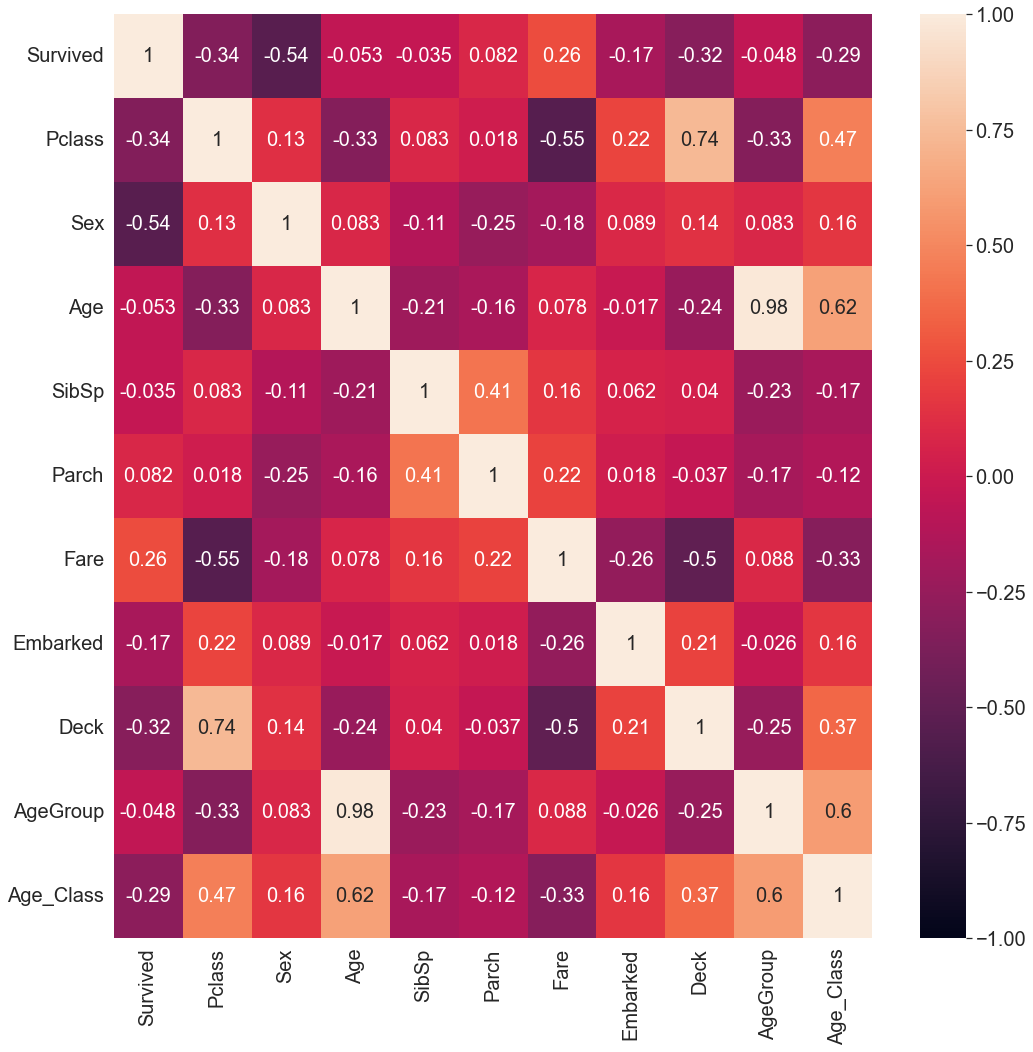

In [21]:
# show correlation between all features after adding a new one
plt.figure(figsize=(17,17))
cor = train_graph_df.corr()
sns.heatmap(cor, vmin=-1, vmax=1, annot=True)
plt.show()

Adding `Age_class` was OK, but `AgeGroup` doesn't seem like it will help us.

We are now ready to move on to selecting and training our model.

#  Training and Validation
-----------------------------

### Before we select our model and train it, we ***encode*** the data using OneHotEncoding to (match encoding for train and test dataframes) so the model can process our data.

In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

train_df_enc = train_df.drop(["Survived"], axis=1)
test_df_enc  = test_df.drop(["PassengerId"], axis=1)
train_df_enc['Sex'] = label.fit_transform(train_df_enc['Sex'])
test_df_enc['Sex'] = label.fit_transform(test_df_enc['Sex'])
train_df_enc['Embarked'] = label.fit_transform(train_df_enc['Embarked'])
test_df_enc['Embarked'] = label.fit_transform(test_df_enc['Embarked'])
train_df_enc['Deck'] = label.fit_transform(train_df_enc['Deck'])
test_df_enc['Deck'] = label.fit_transform(test_df_enc['Deck'])

In [23]:
train_df_enc.info() # show to check all Dtypes are numerics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Sex        891 non-null    int32  
 2   Age        891 non-null    float64
 3   SibSp      891 non-null    int64  
 4   Parch      891 non-null    int64  
 5   Fare       891 non-null    float64
 6   Embarked   891 non-null    int32  
 7   Deck       891 non-null    int32  
 8   AgeGroup   891 non-null    int64  
 9   Age_Class  891 non-null    float64
dtypes: float64(3), int32(3), int64(4)
memory usage: 59.3 KB


In [24]:
test_df_enc.info() # show to check all Dtypes are numerics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    int32  
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   Fare       418 non-null    float64
 6   Embarked   418 non-null    int32  
 7   Deck       418 non-null    int32  
 8   AgeGroup   418 non-null    int64  
 9   Age_Class  418 non-null    float64
dtypes: float64(3), int32(3), int64(4)
memory usage: 27.9 KB


In [25]:
# split the training dataframe into `X` - features, and `t` - target

X = train_df_enc
t = train_df["Survived"].copy()

#### Let's test MLP vs Logistic Regression for each possible 10% jump of temp_train / validation ratio:

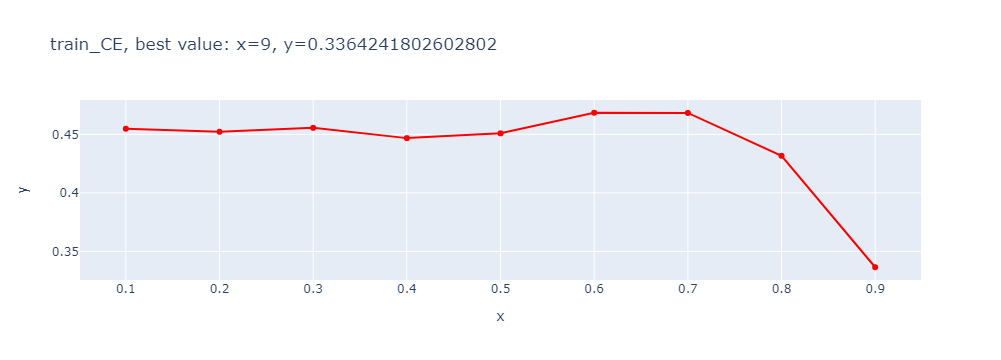

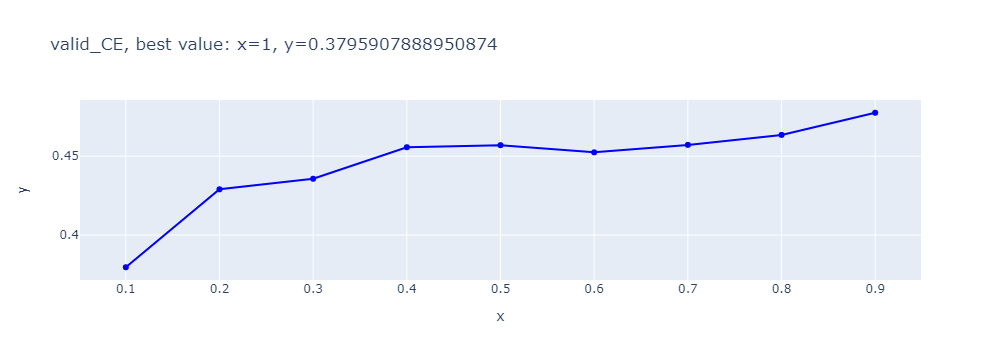

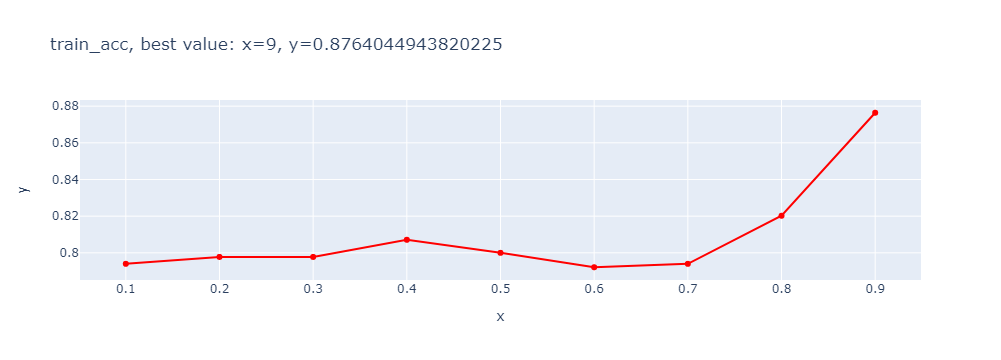

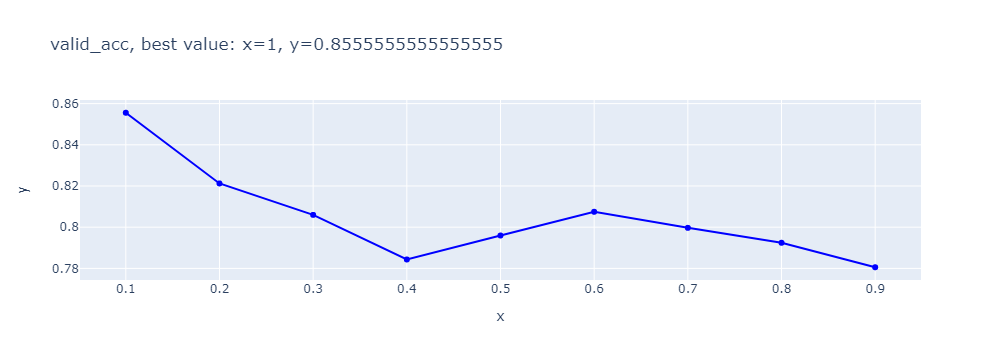

In [26]:
from sklearn import neural_network
import plotly.express as px

mlp = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000)
logistic_regression = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.001))

def show_ce_acc_graphs(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'acc' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'acc' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

def plot_score_and_loss_by_split(_X, _t, model):
    graph_points = { 'train_CE' : {} , 'valid_CE' : {} , 'train_acc' : {}, 'valid_acc' : {} }
    for size in range(10, 100, 10):
        X_train, X_val, t_train, t_val = model_selection.train_test_split(_X, _t, test_size=size/100, random_state=42)
        # create the classifier and predict the probabilities of the train and validation data
        model_cls = model.fit(X_train, t_train)
        y_train_prob = model_cls.predict_proba(X_train)
        y_val_prob = model_cls.predict_proba(X_val)
        graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
        graph_points['valid_CE'][size/100] = metrics.log_loss(t_val, y_val_prob)
        graph_points['train_acc'][size/100] = model_cls.score(X_train, t_train)
        graph_points['valid_acc'][size/100] = model_cls.score(X_val, t_val)
    show_ce_acc_graphs(graph_points)

plot_score_and_loss_by_split(X, t, logistic_regression)

Same but for `MLP`:

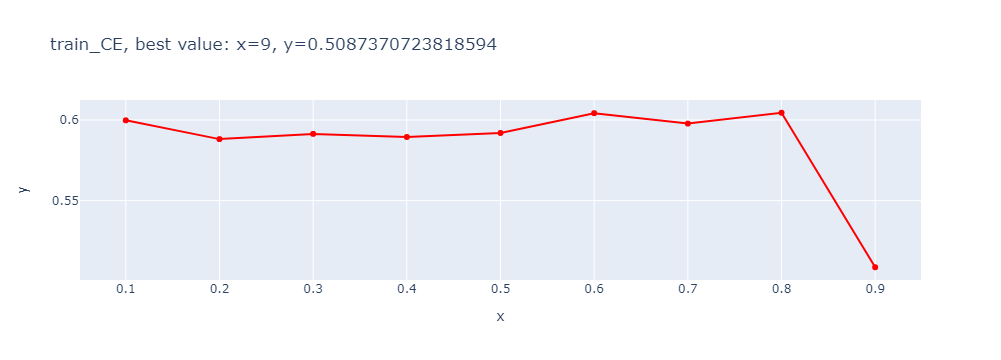

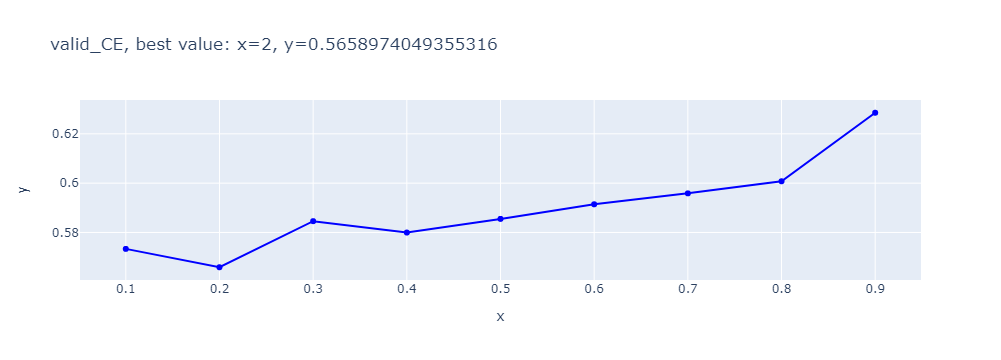

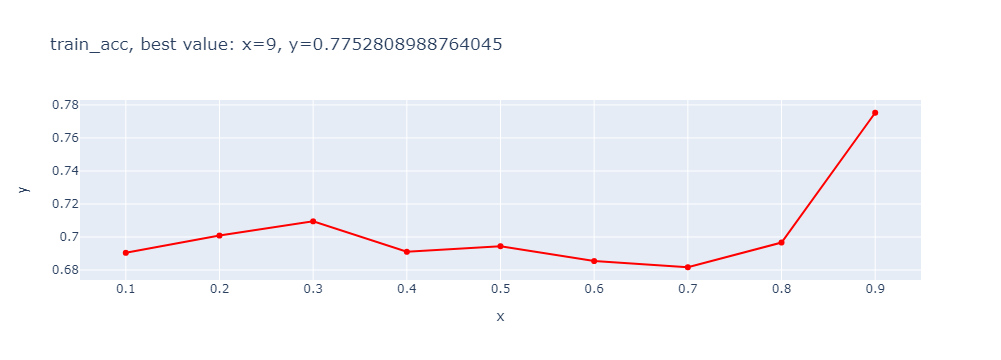

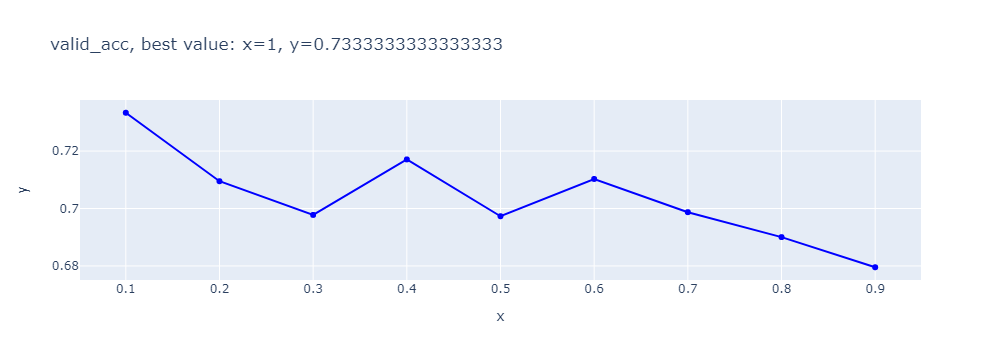

In [27]:
plot_score_and_loss_by_split(X, t, mlp)

**We can see that the `logistic regression` model gives a smaller best loss, so we will choose it and we will choose a point where the valid_ce ~ train_ce (0.3)**

Now we will try to see which feature subgroups from the weaker ones will give us the best result.

In [28]:
TEST_SIZE = 0.3

# get accuracy and CE loss for a praticular x, t pair
def print_ce_acc_for_x(_X, _t, model):
    X_train, X_val, t_train, t_val = model_selection.train_test_split(_X, _t, test_size=TEST_SIZE, random_state=42)
    # create the classifier and predict the probabilities of the train and validation data
    model_cls = model.fit(X_train, t_train)
    y_train_prob = model_cls.predict_proba(X_train)
    y_val_prob = model_cls.predict_proba(X_val)
    print('CE on train', metrics.log_loss(t_train, y_train_prob))
    print('CE on validation', metrics.log_loss(t_val, y_val_prob))
    print('Accuracy score on train', model_cls.score(X_train, t_train))
    print('Accuracy score on validation', model_cls.score(X_val, t_val))
    print('-------')

print_ce_acc_for_x(X, t, logistic_regression) # all features

CE on train 0.4556574900131697
CE on validation 0.43576887973372
Accuracy score on train 0.7961476725521669
Accuracy score on validation 0.8059701492537313
-------


In [29]:
# testing for different subroups - dropping columns with less correlation to survival or high correlation between them
print_ce_acc_for_x(X.drop(['SibSp'], axis=1), t, logistic_regression)
print_ce_acc_for_x(X.drop(['Parch'], axis=1), t, logistic_regression)
print_ce_acc_for_x(X.drop(['SibSp', 'Parch'], axis=1), t, logistic_regression)
print()
print_ce_acc_for_x(X.drop(['AgeGroup'], axis=1), t, logistic_regression)
print_ce_acc_for_x(X.drop(['Age_Class'], axis=1), t, logistic_regression)
print_ce_acc_for_x(X.drop(['AgeGroup', 'Age_Class'], axis=1), t, logistic_regression)
print()
print_ce_acc_for_x(X.drop(['Age_Class', 'Parch'], axis=1), t, logistic_regression)
print_ce_acc_for_x(X.drop(['Age_Class', 'Parch', 'AgeGroup'], axis=1), t, logistic_regression)

CE on train 0.46134066196646545
CE on validation 0.44188952197717934
Accuracy score on train 0.8009630818619583
Accuracy score on validation 0.8059701492537313
-------
CE on train 0.45649658604462123
CE on validation 0.43683705563946507
Accuracy score on train 0.7945425361155698
Accuracy score on validation 0.7947761194029851
-------
CE on train 0.4635253072569368
CE on validation 0.4434325247113255
Accuracy score on train 0.7993579454253612
Accuracy score on validation 0.7873134328358209
-------

CE on train 0.45611362707906195
CE on validation 0.4359229393071867
Accuracy score on train 0.7961476725521669
Accuracy score on validation 0.8059701492537313
-------
CE on train 0.45608744976438126
CE on validation 0.4368979824377158
Accuracy score on train 0.7913322632423756
Accuracy score on validation 0.8097014925373134
-------
CE on train 0.4571403819617225
CE on validation 0.4373210537263083
Accuracy score on train 0.7961476725521669
Accuracy score on validation 0.8059701492537313
-----

These results give us some idea what to focus on when trying to improve submission results. (I removed weaker results which I tested as they are less relevant for results comparing)

# Submission

In [30]:
X = train_df_enc.drop(['AgeGroup'], axis=1)
t = train_df["Survived"].copy()
X_test = test_df_enc.drop(['AgeGroup'], axis=1)

classifer = logistic_regression.fit(X, t)
prediction = classifer.predict(X_test)

output = pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived' : prediction})
output.to_csv('submission.csv',index=False)

# Kaggle Results

![leaderboard](https://i.imgur.com/bVnusgQ.png)


![runs](https://i.imgur.com/oLuVHqH.png)

# Thoughts and summary
- The hyper-features we added didn't help us much, looking at top scoring notebooks, there are smarter ways to create hyper-features, plus using data we ignored like `Ticket` and `Name`
- `MLP` performed noticably worse than `Logistic-Regression` at submissions, this is known that in practice `MLP` is harder to train and use than `log-reg` for `Binary Classification`, even though theoretically it should not perform worse.
- It was hard to see what will work on the submissions from testing different inputs for the validation tests since most of the results vary from run to run, perhaps there is a better way than my implementation.
- There are a ton of approches for each step of the way!

# Sources Used:
- https://www.kaggle.com/alexisbcook/titanic-tutorial
- https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
- https://stackoverflow.com/
- https://scikit-learn.org/stable/user_guide.html
- https://seaborn.pydata.org/tutorial.html